In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../Downloads/Titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,NaN,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop(columns = ["Cabin"])

In [5]:
df = df.drop(columns = ["PassengerId"])

In [6]:
df = df.drop(columns = ["Ticket"])

In [7]:
df = df.drop(columns = ["Name"])

In [8]:
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])

In [9]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [10]:
np.unique(df["Embarked"])

array(['C', 'Q', 'S'], dtype=object)

In [11]:
np.unique(df["Sex"])

array(['female', 'male'], dtype=object)

In [12]:
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})

In [13]:
df["Sex"] = df["Sex"].map({"female":0, "male":1})

In [14]:
x = df.drop(columns = ["Embarked"])
y = df["Embarked"]

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators = 100)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

Accuracy is : 0.8603351955307262
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        39
           1       0.90      0.69      0.78        13
           2       0.88      0.93      0.90       127

    accuracy                           0.86       179
   macro avg       0.85      0.77      0.81       179
weighted avg       0.86      0.86      0.86       179



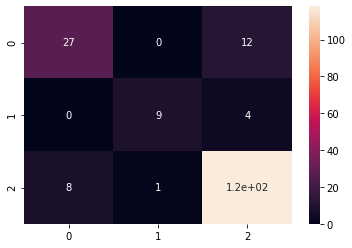

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))